<a href="https://colab.research.google.com/github/Devmurthy/FMML_Project_and_labs/blob/main/FMML_Module_2_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

```
Coordinator: Aswin Jose
```

---

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [2]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart.csv


In [3]:
data = pd.read_csv("heart.csv")
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
data.shape

(303, 14)

In [5]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation

In [6]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [7]:
data.head()

age     sex                cp  trestbps  chol  fbs  restecg  thalach exang  \
0   63    Male  non-anginal pain       145   233    1        0      150    No   
1   37    Male   atypical_angina       130   250    0        1      187    No   
2   41  Female    typical_angina       130   204    0        0      172    No   
3   56    Male    typical_angina       120   236    0        1      178    No   
4   57  Female                 0       120   354    0        1      163   Yes   

   oldpeak             slope  ca               thal   target  
0      2.3  non-anginal pain   0       fixed_defect  Disease  
1      3.5   atypical_angina   0  reversable_defect  Disease  
2      1.4    typical_angina   0  reversable_defect  Disease  
3      0.8    typical_angina   0  reversable_defect  Disease  
4      0.6                 0   0  reversable_defect  Disease

First, lets look at the difference in the number of samples with and without disease using a barplot.

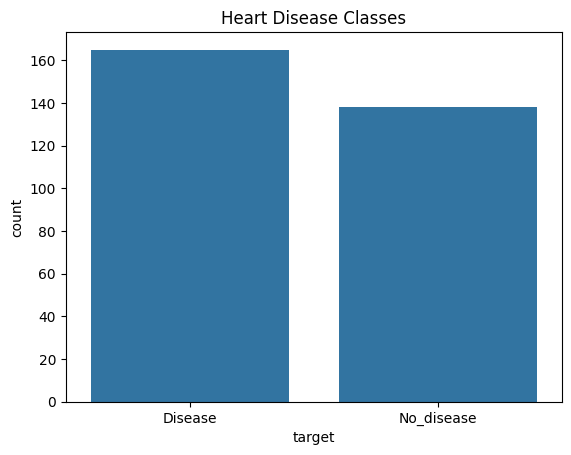

In [8]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

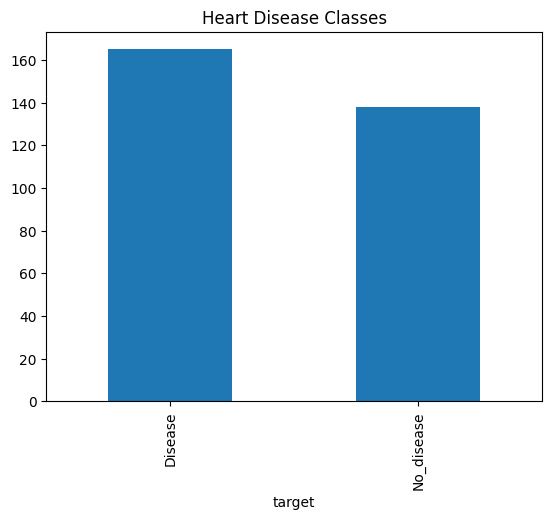

In [9]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

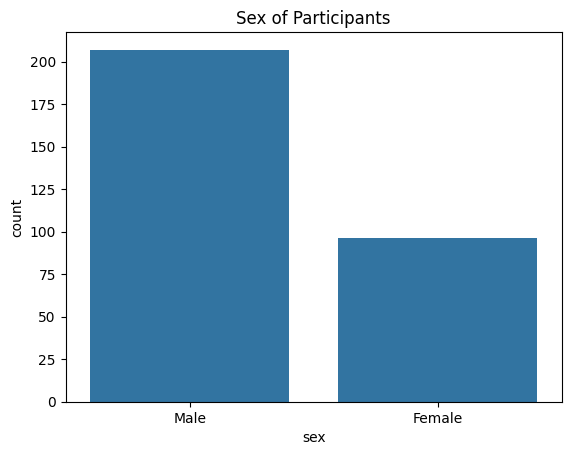

In [11]:
## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
## to do
sns.countplot(x='sex', data=data)
plt.title('Sex of Participants')
plt.show()

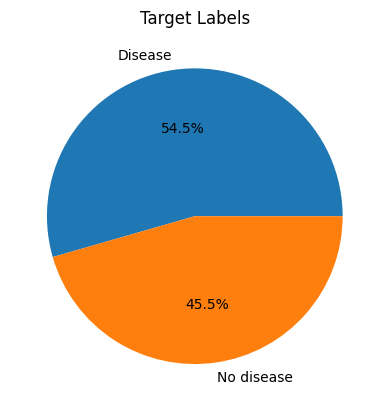

In [12]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

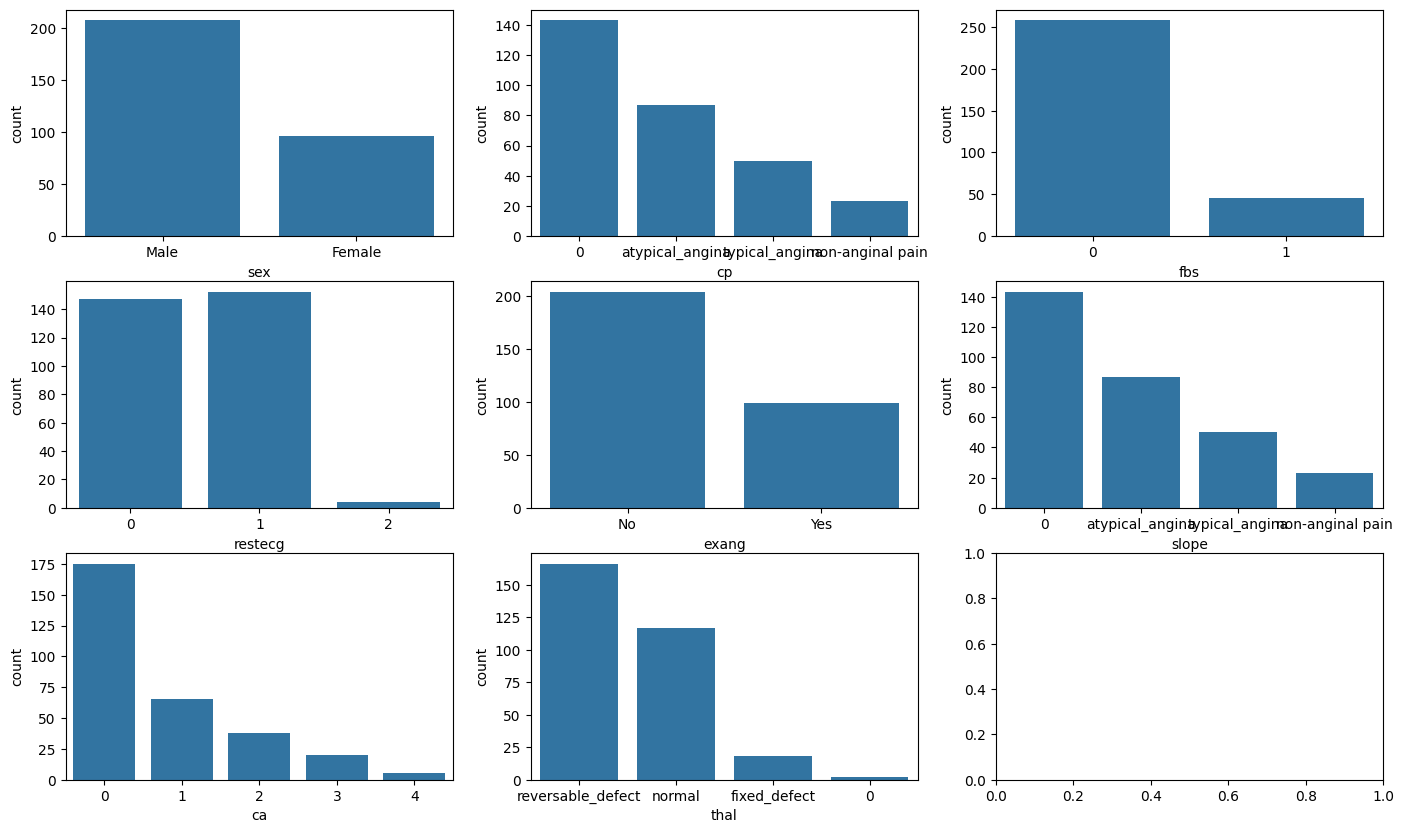

In [13]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

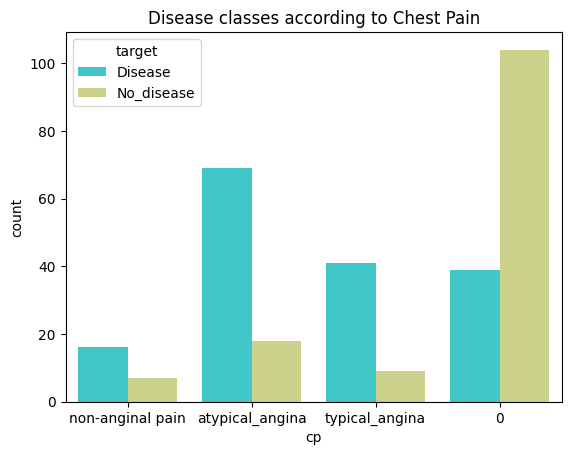

In [14]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

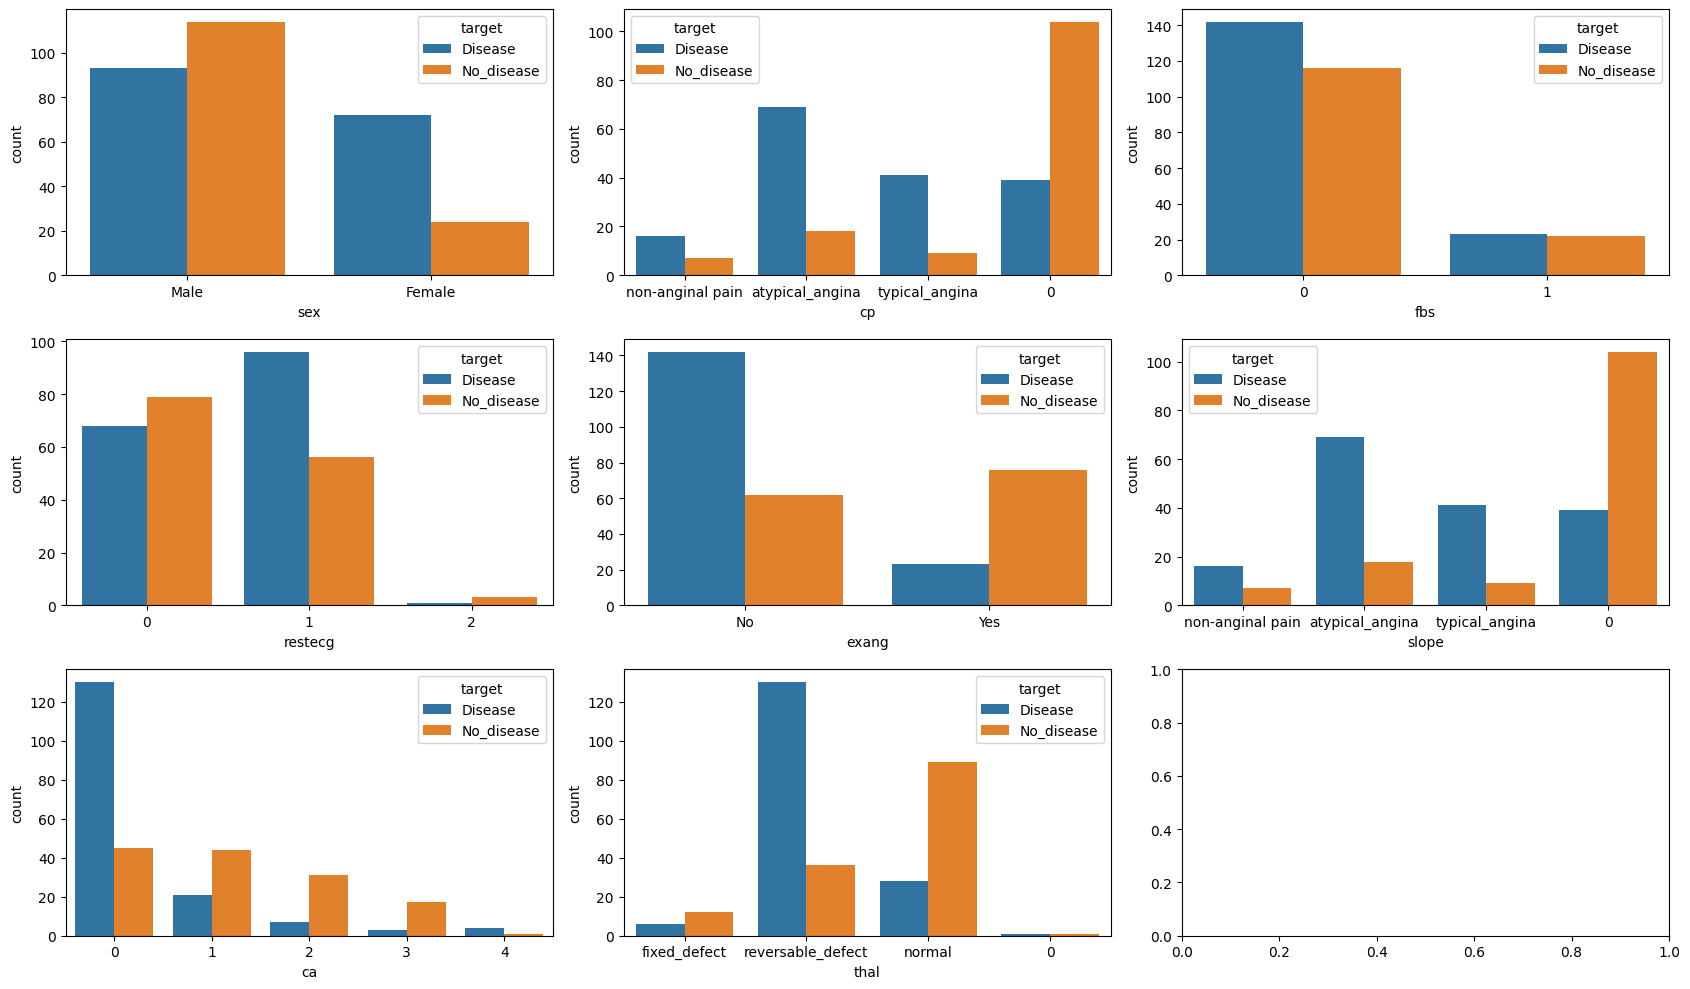

In [17]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.countplot(x=feature, hue='target', data=data, ax=ax)
plt.tight_layout()
plt.show()


In [18]:
# Visualising the distribution of the continous variables

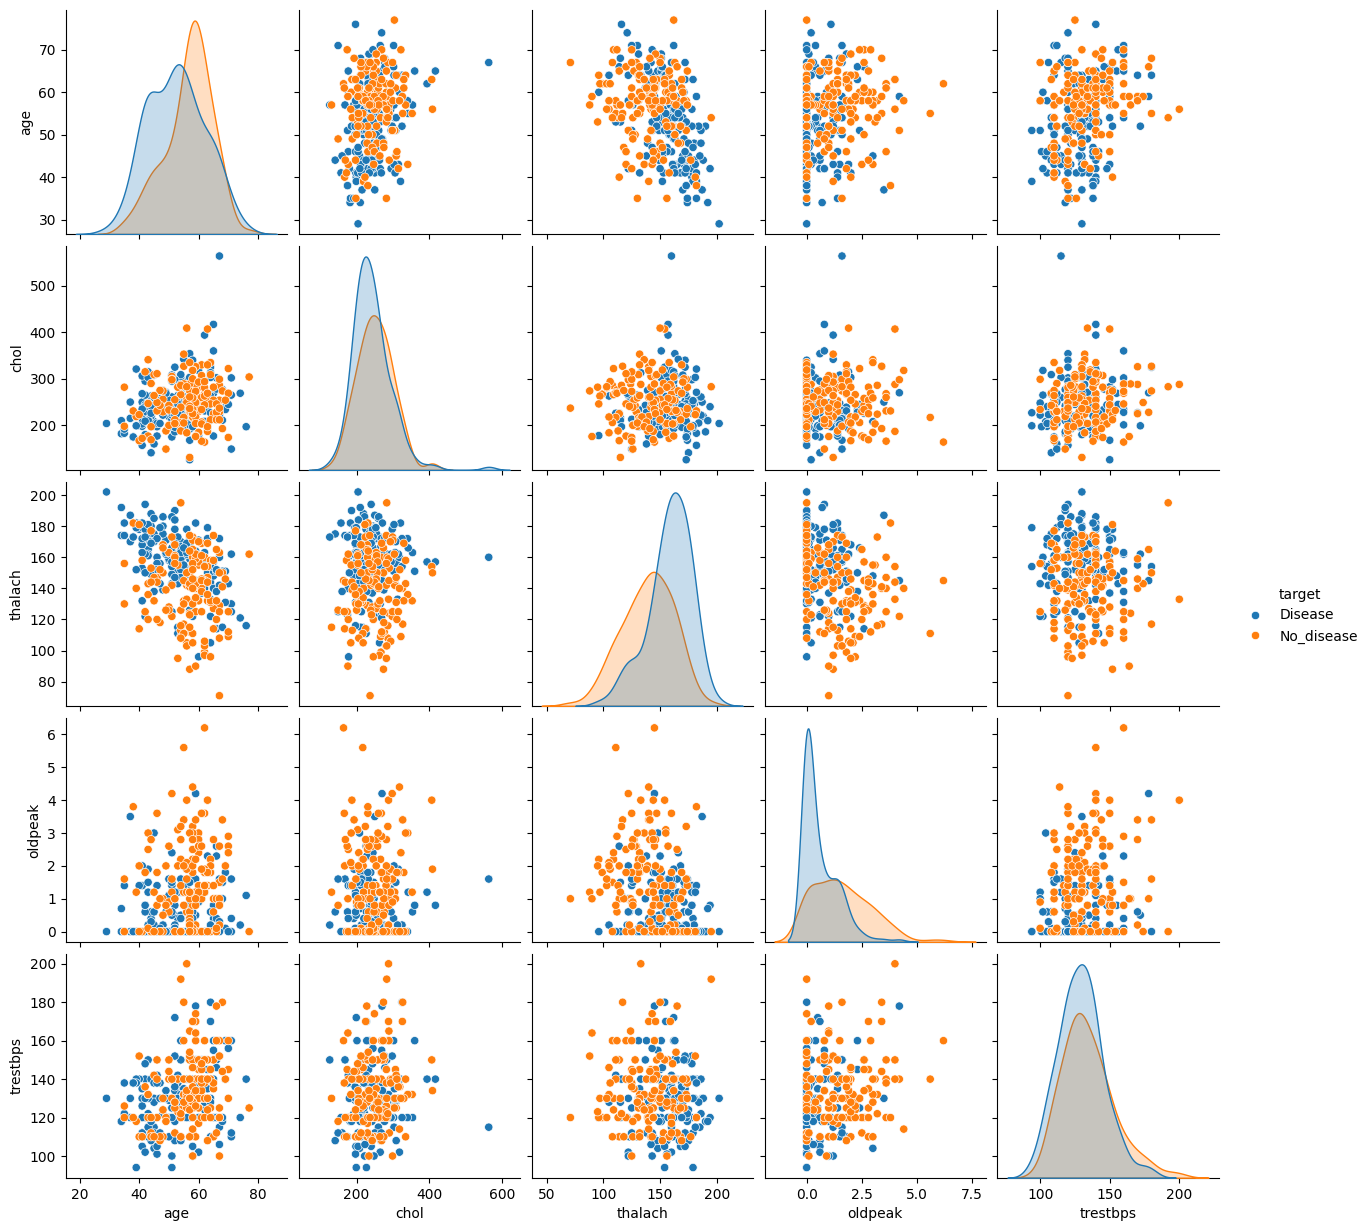

In [19]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

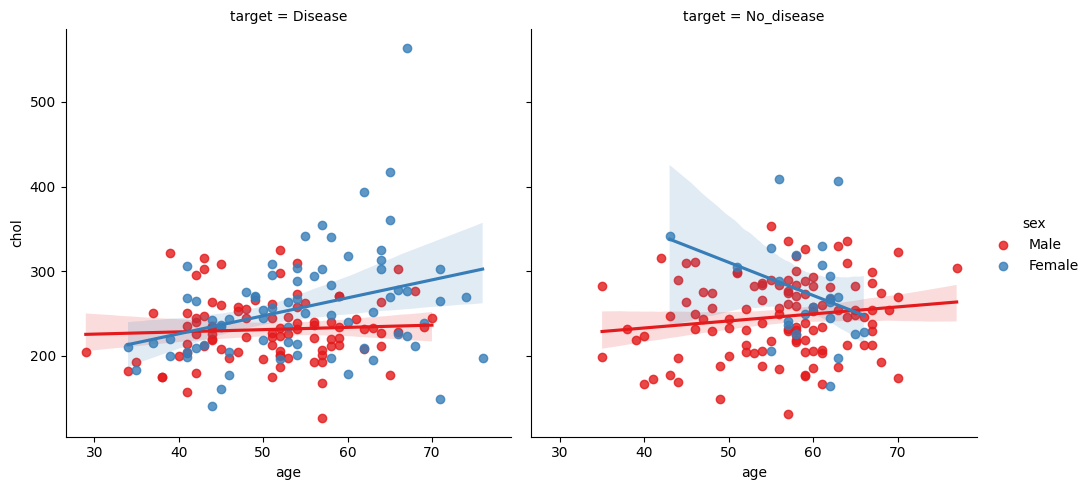

In [20]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

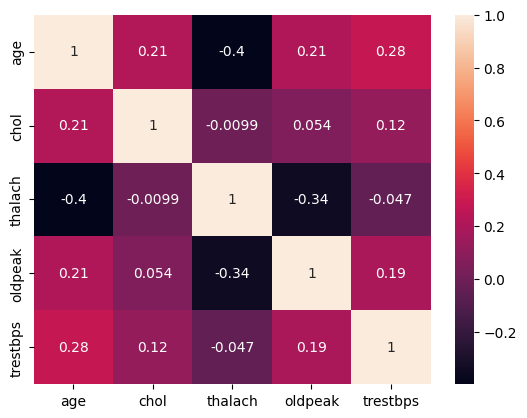

In [21]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

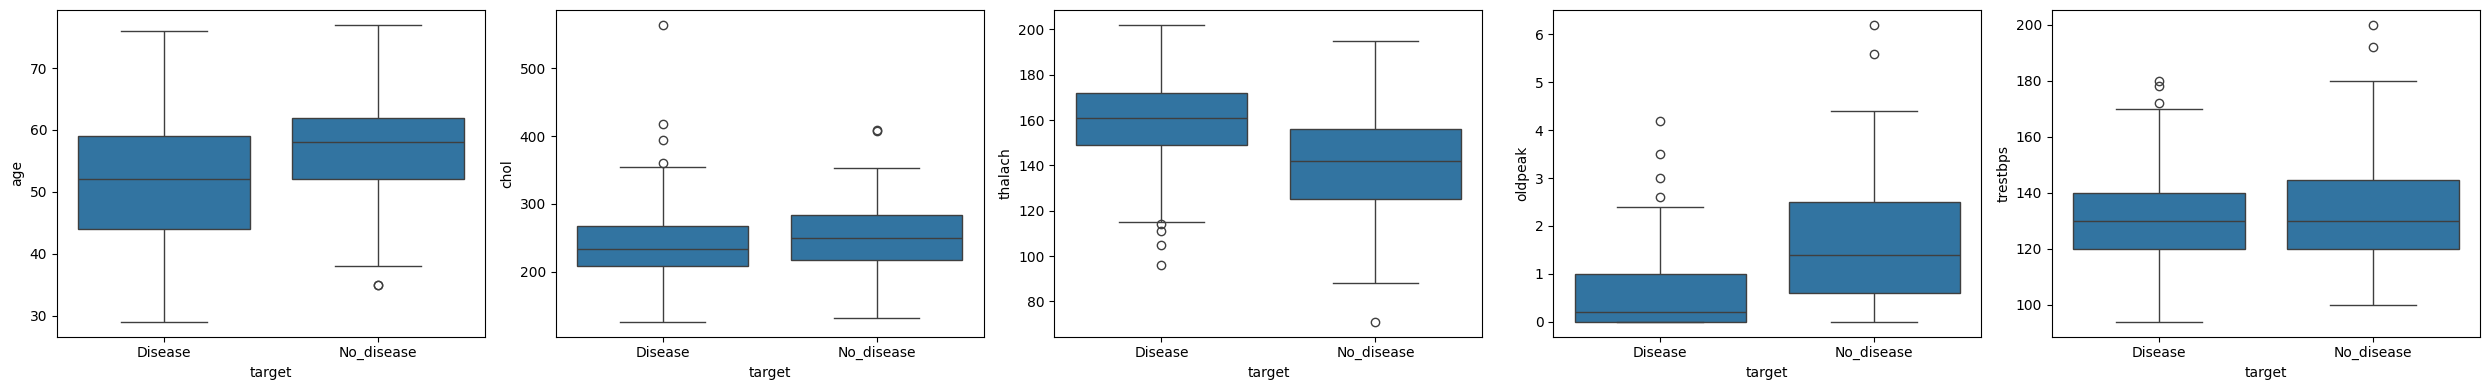

In [22]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

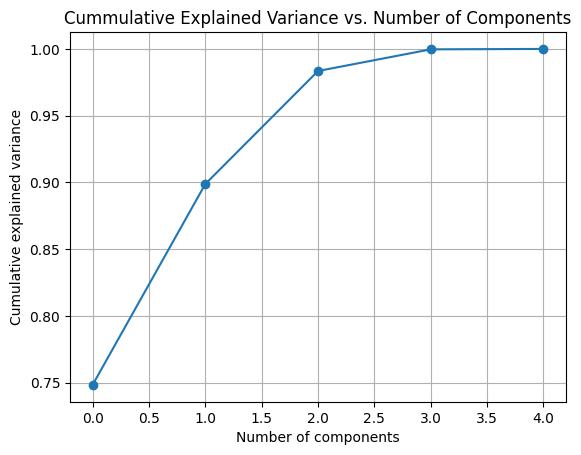

In [24]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cummulative Explained Variance vs. Number of Components')
plt.grid(True) #Add ghrid for better readability
plt.show()


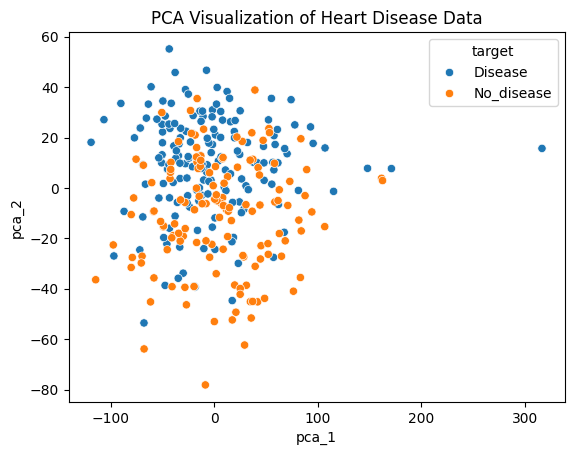

In [25]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


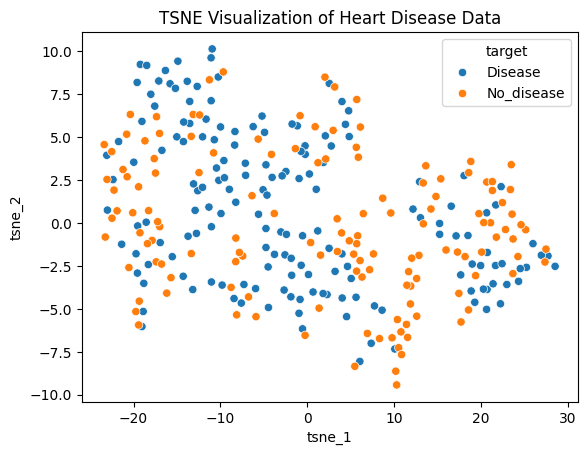

In [26]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?
Answer: The percentage of Samples with Disease is 54.5%    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?
Answer: The 3 COntinous features are thalach(maximum heart rate achieved),oldpeak(ST depression induced by exercise relative to rest),cp(chest pain type).    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?
Answer:Yes, PCA and t-SNE plots can show clear separation in terms of disease presence/absence if the features are well-separated in the original high-dimensional space. PCA emphasizes variance, so separation depends on whether disease-related features contribute significantly to variance. t-SNE focuses on local similarity, so it can better reveal clustering and non-linear separations even if PCA does not. Therefore, t-SNE is generally more effective at visualizing disease separations if there are complex, non-linear relationships in the data.    
4. What is the optimal number of principal components in our case?
Answer:In general, the optimal number of principal components is the number at the elbow point, as it captures a significant portion of the variance while reducing the dimensionality of the data.
5. what are the continous features with the highest correation with each other?
Answer:Based on the heatmap in the image, the continuous features with the highest correlation with each other appear to be:
1. age and trestbps(correlation = 0.28)
2. age and oldpeak (correlation = 0.21)
3. chol and age(correlation = 0.21)
These are the features with the most significant positive correlations visible in the heatmap.

Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [28]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded.csv


In [29]:
data = pd.read_csv("star_nutri_expanded.csv")

In [30]:
data.head()

Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

  Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0           0.1            0.0                0.0            0   
1           0.1            0.0                0.0            0   
2           0.1            0.0                0.0            0   
3           0.1            0.0                0.0            0   
4           0.1            0.1                0.0            5   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                        5                 0                  0           0   
1                       10                 0                  0           0   
2                       10                 0                  0           0   
3                       10                 0                  0           0   
4                       75                10                  0           9   

   Protein (g) Vitamin A (% DV) Vitamin C (% DV) Calcium (% DV) Iron (% DV)  \
0          0.3               0%               0%             0%          0%   
1          0.5               0%               0%             0%          0%   
2          1.0               0%               0%             0%          0%   
3          1.0               0%               0%             2%          0%   
4          6.0              10%               0%            20%          0%   

  Caffeine (mg)  
0           175  
1           260  
2           330  
3           410  
4            75

cleaning and filling the missing values in the data

In [31]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [32]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [33]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [35]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [36]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [37]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [38]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [39]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [40]:

data = data.replace({True: 1, False: 0})


In [41]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-41-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [42]:
data.head()

Calories  Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0       3.0            0.1            0.0                0.0          0.0   
1       4.0            0.1            0.0                0.0          0.0   
2       5.0            0.1            0.0                0.0          0.0   
3       5.0            0.1            0.0                0.0          0.0   
4      70.0            0.1            0.1                0.0          5.0   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                      5.0               0.0                0.0         0.0   
1                     10.0               0.0                0.0         0.0   
2                     10.0               0.0                0.0         0.0   
3                     10.0               0.0                0.0         0.0   
4                     75.0              10.0                0.0         9.0   

   Protein (g)  ...  bevp_Grande Nonfat Milk  bevp_Short  \
0          0.3  ...                      0.0         1.0   
1          0.5  ...                      0.0         0.0   
2          1.0  ...                      0.0         0.0   
3          1.0  ...                      0.0         0.0   
4          6.0  ...                      0.0         0.0   

   bevp_Short Nonfat Milk  bevp_Solo  bevp_Soymilk  bevp_Tall  \
0                     0.0        0.0           0.0        0.0   
1                     0.0        0.0           0.0        1.0   
2                     0.0        0.0           0.0        0.0   
3                     0.0        0.0           0.0        0.0   
4                     1.0        0.0           0.0        0.0   

   bevp_Tall Nonfat Milk  bevp_Venti  bevp_Venti Nonfat Milk  bevp_Whole Milk  
0                    0.0         0.0                     0.0              0.0  
1                    0.0         0.0                     0.0              0.0  
2                    0.0         0.0                     0.0              0.0  
3                    0.0         1.0                     0.0              0.0  
4                    0.0         0.0                     0.0              0.0  

[5 rows x 62 columns]

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

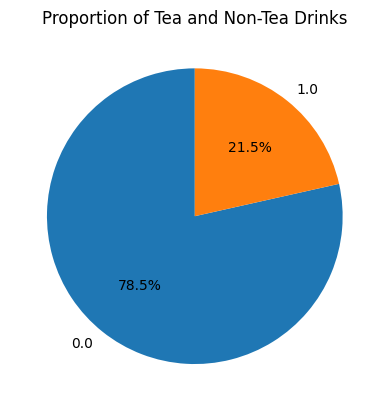

Observation: The pie chart shows the proportion of tea and non-tea drinks in the dataset. The majority of drinks are non-tea, as indicated by the larger slice of the pie.


In [46]:
## to do

# Create a pie chart of the 'Tea' column also write your observation form the plot
# Calculate the value counts for the 'Tea' column
tea_counts = data['Tea'].value_counts()

# Create the pie chart
plt.pie(tea_counts, labels=tea_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Tea and Non-Tea Drinks')
plt.show()

# Observation
print("Observation: The pie chart shows the proportion of tea and non-tea drinks in the dataset. The majority of drinks are non-tea, as indicated by the larger slice of the pie.")


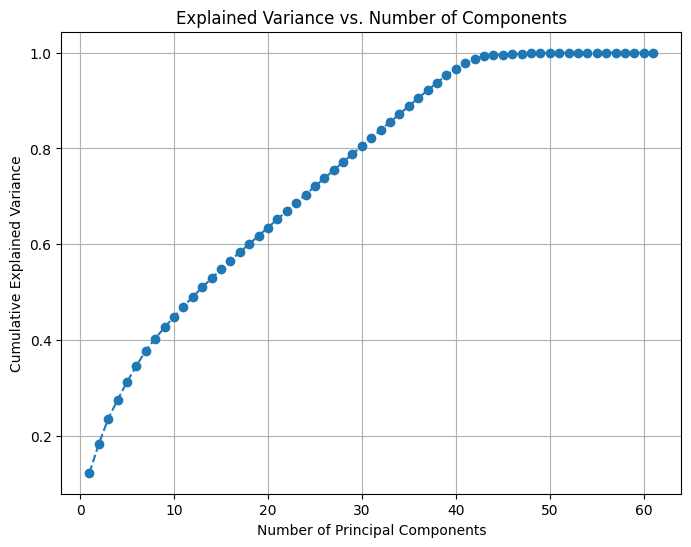

Optimal number of components to retain 95% variance: 39


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming X is your feature matrix
# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Fit PCA
pca = PCA()
pca.fit(X_scaled)

# Step 3: Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 4: Plot explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Step 5: Determine the number of components for 95% variance
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components to retain 95% variance: {optimal_components}")


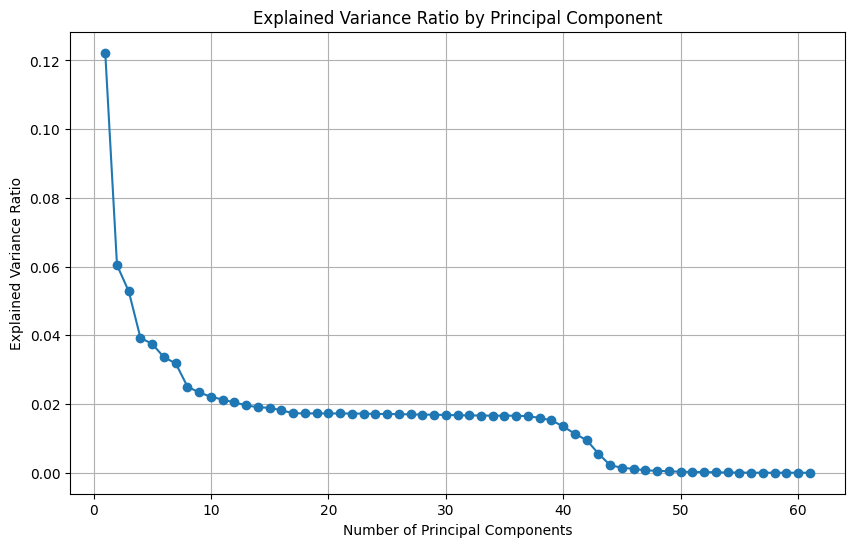

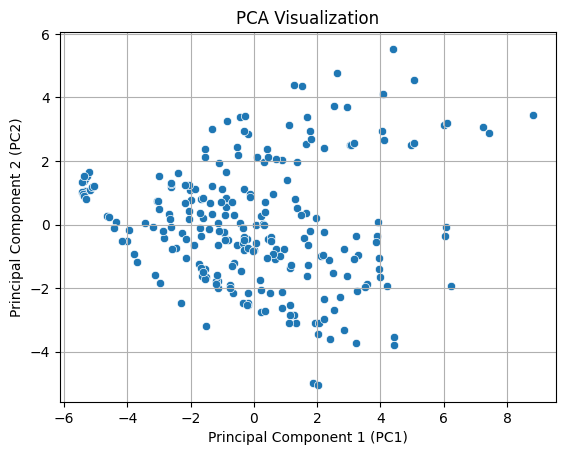

Observations from the PCA scatter plot:
1. General Distribution: Focus on the overall distribution of the points.
2. Dimensionality Reduction Effectiveness: Assess how well PCA has reduced the dimensionality.


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame with numeric features
# Separate features (X) from target (y) if you have a target variable
X = data.drop('Tea', axis=1)  # Replace 'Tea' with your target column if any

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA to find optimal number of components
pca = PCA()
pca.fit(X_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

# Determine optimal number of components
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_num_components = np.argmax(cumulative_variance >= 0.90) + 1  # Set threshold for cumulative variance

# Apply PCA with the optimal number of components
pca = PCA(n_components=optimal_num_components)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(optimal_num_components)])

# Visualize the principal components using a scatter plot
if optimal_num_components >= 2:  # Check if there are at least 2 components to plot.
    sns.scatterplot(x="PC1", y="PC2", data=pc_df, hue='target' if 'target' in pc_df.columns else None)
    plt.xlabel('Principal Component 1 (PC1)')
    plt.ylabel('Principal Component 2 (PC2)')
    plt.title('PCA Visualization')
    plt.grid(True)
    plt.show()

    # Observations from the plot
    print("Observations from the PCA scatter plot:")
    if 'target' in pc_df.columns:
        print("1. Distinct Clusters: Look for clusters formed by different classes in the target variable.")
        print("2. Overlapping Points: If there's significant overlap between different classes, this suggests that the features may not be sufficient to separate the classes.")
        print("3. Variance Representation: Analyze how much variance is captured by PC1 and PC2.")
        print("4. Outliers: Identify any outlier points that deviate significantly from the rest of the data.")
    else:
        print("1. General Distribution: Focus on the overall distribution of the points.")
        print("2. Dimensionality Reduction Effectiveness: Assess how well PCA has reduced the dimensionality.")
else:
    print("Not enough principal components to visualize in a 2D scatter plot.")


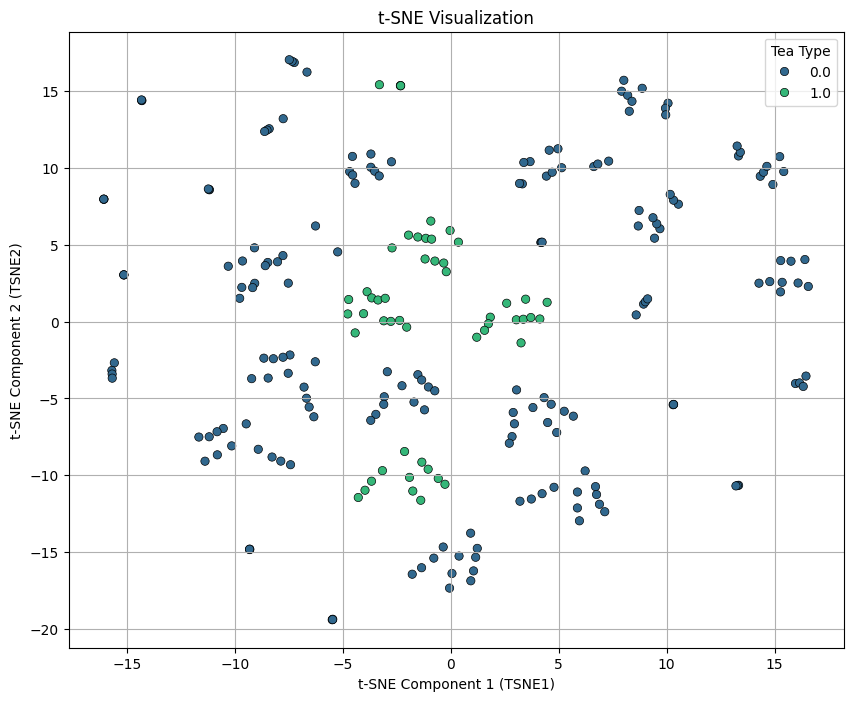

Observations from the t-SNE scatter plot:
Distinct Clusters: Look for distinct clusters formed by different tea types.
Overlapping Points: Identify if there's significant overlap between different tea types, indicating similarity.
Density of Points: Notice areas with high density of points, which suggest common characteristics among samples.
Outliers: Check for any outlier points that may deviate from the overall distribution.
Color Patterns: Analyze how different colors represent the tea types and their distribution.
Ambiguous Areas: If certain areas contain mixed colors, this may suggest relationships between classes.


In [59]:
## to do
# plot the first 2 components of tsne, whats you observation from the plot?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame with numeric features
# Replace 'Tea' with your target column if needed

# Separate features (X) from target (y)
X = data.drop('Tea', axis=1)  # Features
y = data['Tea']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # Adjust perplexity as needed
tsne_components = tsne.fit_transform(X_scaled)

# Create a DataFrame with the t-SNE components and target labels
tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])
tsne_df['target'] = y  # Add the target variable for coloring

# Visualize the t-SNE components using a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x="TSNE1", y="TSNE2", data=tsne_df, hue="target", palette='viridis', edgecolor='k')
plt.xlabel('t-SNE Component 1 (TSNE1)')
plt.ylabel('t-SNE Component 2 (TSNE2)')
plt.title('t-SNE Visualization')
plt.grid(True)
plt.legend(title='Tea Type')
plt.show()

# Observations
print("Observations from the t-SNE scatter plot:")
if 'target' in tsne_df.columns:
    # General observations
    print("Distinct Clusters: Look for distinct clusters formed by different tea types.")
    print("Overlapping Points: Identify if there's significant overlap between different tea types, indicating similarity.")
    print("Density of Points: Notice areas with high density of points, which suggest common characteristics among samples.")
    print("Outliers: Check for any outlier points that may deviate from the overall distribution.")
    print("Color Patterns: Analyze how different colors represent the tea types and their distribution.")
    print("Ambiguous Areas: If certain areas contain mixed colors, this may suggest relationships between classes.")
else:
    print("No target variable provided for observations.")


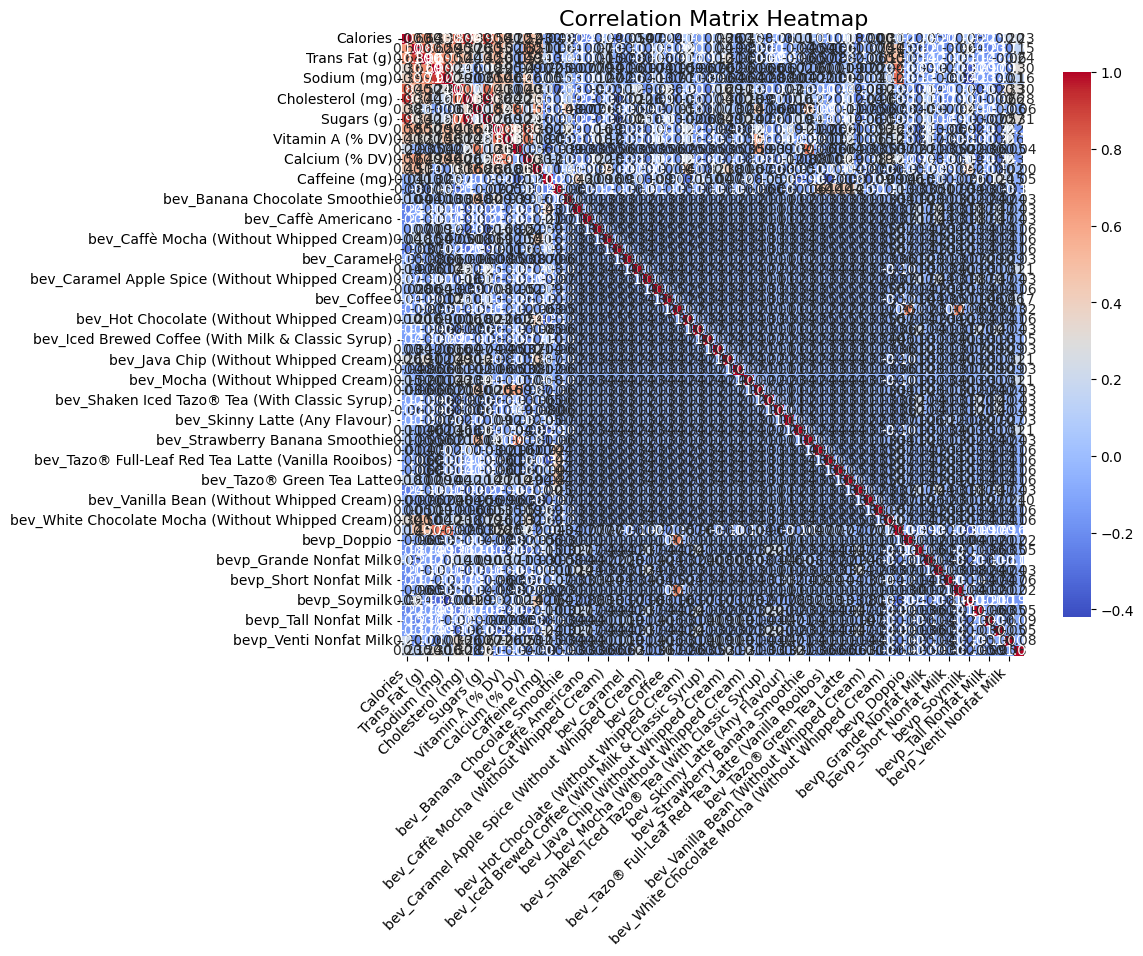

Observations from the Correlation Matrix Heatmap:
1. Strong Positive Correlations (> 0.7): [('Calories', 'Calories'), ('Calories', 'Total Carbohydrates (g)'), ('Calories', 'Cholesterol (mg)'), ('Calories', 'Sugars (g)'), ('Total Fat (g)', 'Total Fat (g)'), ('Total Fat (g)', 'Trans Fat (g)'), ('Trans Fat (g)', 'Total Fat (g)'), ('Trans Fat (g)', 'Trans Fat (g)'), ('Trans Fat (g)', 'Sodium (mg)'), ('Saturated Fat (g)', 'Saturated Fat (g)'), ('Saturated Fat (g)', 'Sodium (mg)'), ('Saturated Fat (g)', 'bevp_2% Milk'), ('Sodium (mg)', 'Trans Fat (g)'), ('Sodium (mg)', 'Saturated Fat (g)'), ('Sodium (mg)', 'Sodium (mg)'), ('Sodium (mg)', 'bevp_2% Milk'), ('Total Carbohydrates (g)', 'Calories'), ('Total Carbohydrates (g)', 'Total Carbohydrates (g)'), ('Total Carbohydrates (g)', 'Cholesterol (mg)'), ('Total Carbohydrates (g)', 'Sugars (g)'), ('Cholesterol (mg)', 'Calories'), ('Cholesterol (mg)', 'Total Carbohydrates (g)'), ('Cholesterol (mg)', 'Cholesterol (mg)'), ('Cholesterol (mg)', 'Sugars 

In [63]:
## to do
# create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# data = pd.read_csv('your_dataset.csv')  # Uncomment and replace with your actual data loading method

# Assuming 'data' is your DataFrame with numeric features

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Observations
print("Observations from the Correlation Matrix Heatmap:")
# Define a threshold for strong correlation
strong_corr_threshold = 0.7

# Identify strong positive correlations
strong_positive_corr = correlation_matrix[correlation_matrix > strong_corr_threshold].stack().index.tolist()
strong_negative_corr = correlation_matrix[correlation_matrix < -strong_corr_threshold].stack().index.tolist()

if strong_positive_corr:
    print(f"1. Strong Positive Correlations (> {strong_corr_threshold}): {strong_positive_corr}")
else:
    print("1. No strong positive correlations found.")

if strong_negative_corr:
    print(f"2. Strong Negative Correlations (< -{strong_corr_threshold}): {strong_negative_corr}")
else:
    print("2. No strong negative correlations found.")

# General Insights
print("3. Analyze features with high correlations to identify potential multicollinearity.")
print("4. Consider relationships between features and the target variable (if applicable) for feature selection.")


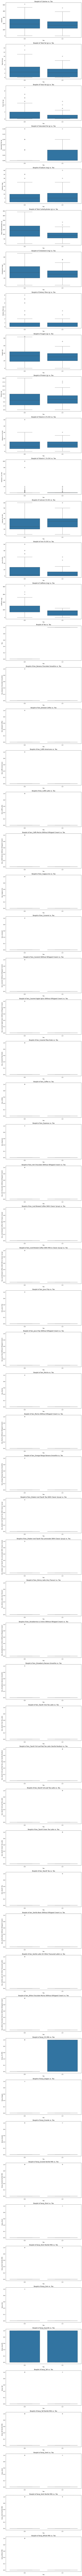

Potential indicators for Tea vs. Non-Tea: ['Caffeine (mg)', 'Sugars (g)', 'Total Carbohydrate (g)']


In [66]:
## to do
# make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?
import seaborn as sns
import matplotlib.pyplot as plt

# Get numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns

# Create boxplots for each numeric column against 'Tea'
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(10, 5 * len(numeric_cols)))
# Adjust figsize as needed

for i, col in enumerate(numeric_cols):
    sns.boxplot(x='Tea', y=col, data=data, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} vs. Tea')

plt.tight_layout()
plt.show()

# Potential indicators based on boxplot differences:
# Observe which columns show significant differences in the distribution
# (median, quartiles, outliers) between Tea (1) and Non-Tea (0).
# These columns are potential indicators.
# For example, if 'Caffeine (mg)' shows a clear difference in median
# between Tea and Non-Tea, it could be a potential indicator.

# Print a list of potential indicators:
potential_indicators = ['Caffeine (mg)', 'Sugars (g)', 'Total Carbohydrate (g)']  # Add more based on observations
print("Potential indicators for Tea vs. Non-Tea:", potential_indicators)

To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.